# TKET: Quantinuum’s advanced quantum SDK <br /> for the NISQ era

<br>
<br>

Kathrin Spendier &rarr; <kathrin.spendier@quantinuum.com>, 


Notebook and slides available at: &rarr; https://github.com/spendierk/Q-SITE-Toronto-2022

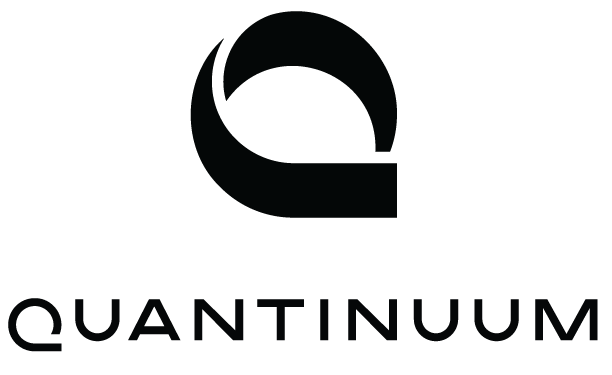

## Quantinuum's Model is Built Around Platform Inclusivity

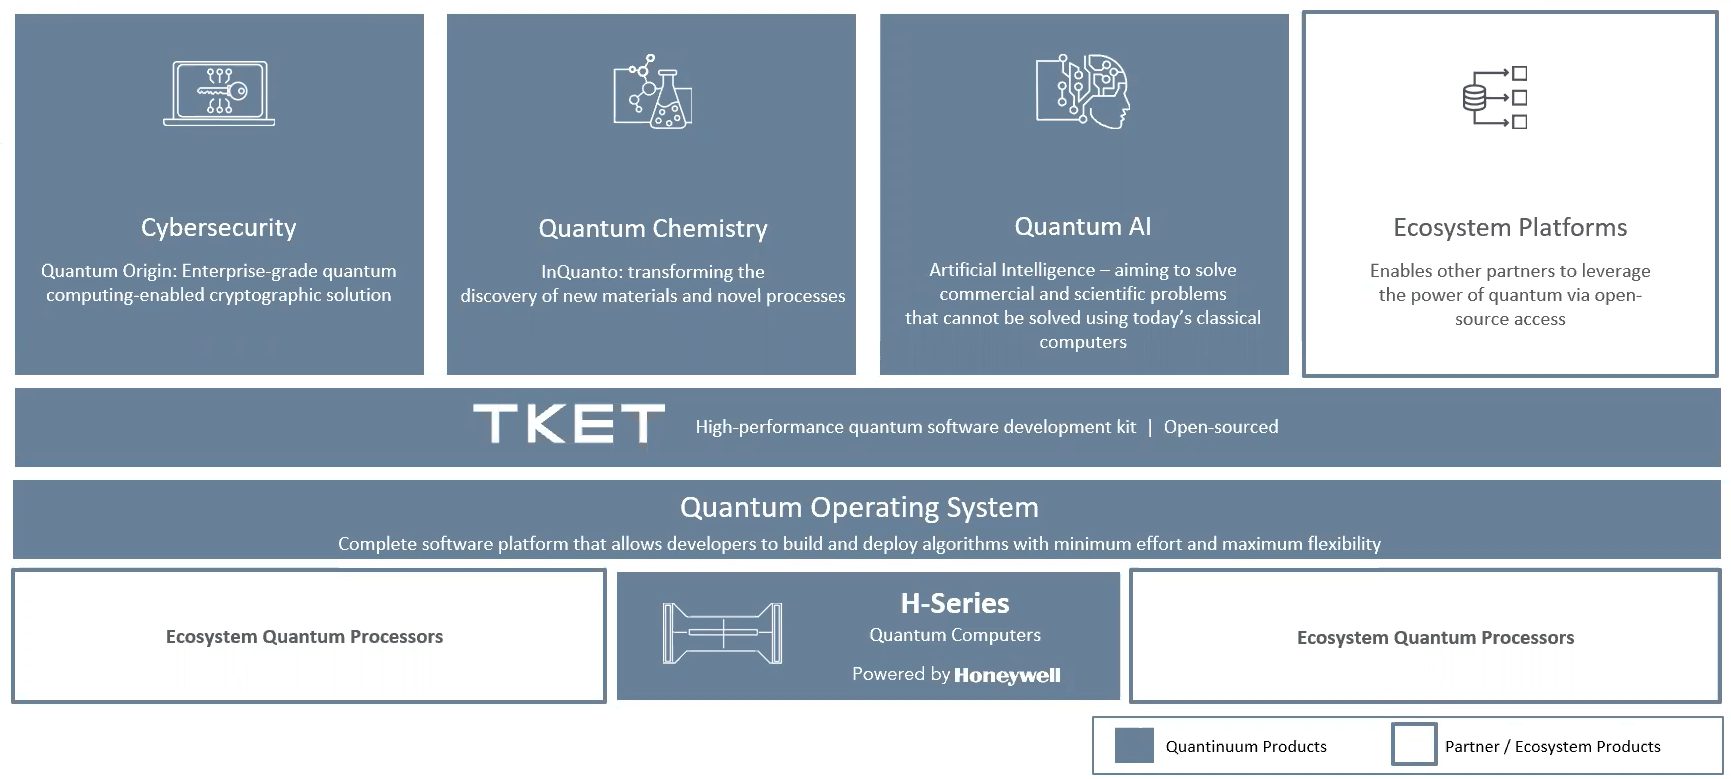

## Workshop Contents

This tutorial will explore tools available in TKET, providing a comprehensive, feature-focused tour of the platform.

We will cover the following:
1. Introduction, installing and getting started with TKET and its extensions.
2. Quantum gates, measurement, and the construction of quantum circuits.
3. Tools that enable moving code between devices and software packages.
4. Steps required to prepare circuits to be run on a quantum computer.
5. Running circuits on quantum computers and classical simulators.



# The State of Quantum Computers and SDK

Noise:
- Noisy Intermediate-Scale Quantum &rarr; low numbers of qubits and high error rates.
- Error correction, break encryption, Grover's search &rarr; ❌

Operations:
- The devices will often only support a small fragment of quantum circuits.
- Only possible to perform multi-qubit operations between specific pairs of qubits.

Software:
- Utilization of desirable devices may be locked behind specific interface software.

## What is TKET?

TKET is a software platform for the development and execution of gate-level quantum computation. 

<p><em><center>It automatically handles many of the intricacies of NISQ technology.</center></em></p>

In Particular, TKET:
- Noise and operations &rarr; Provides state-of-the-art performance in circuit compilation and optimization. 
- Software &rarr; Facilitates platform-agnostic software development, allowing code reuse.

<p><em><center> Frees the user to focus on the technique or project they are working on!</center></em></p>

## IBM’s Guadalupe device


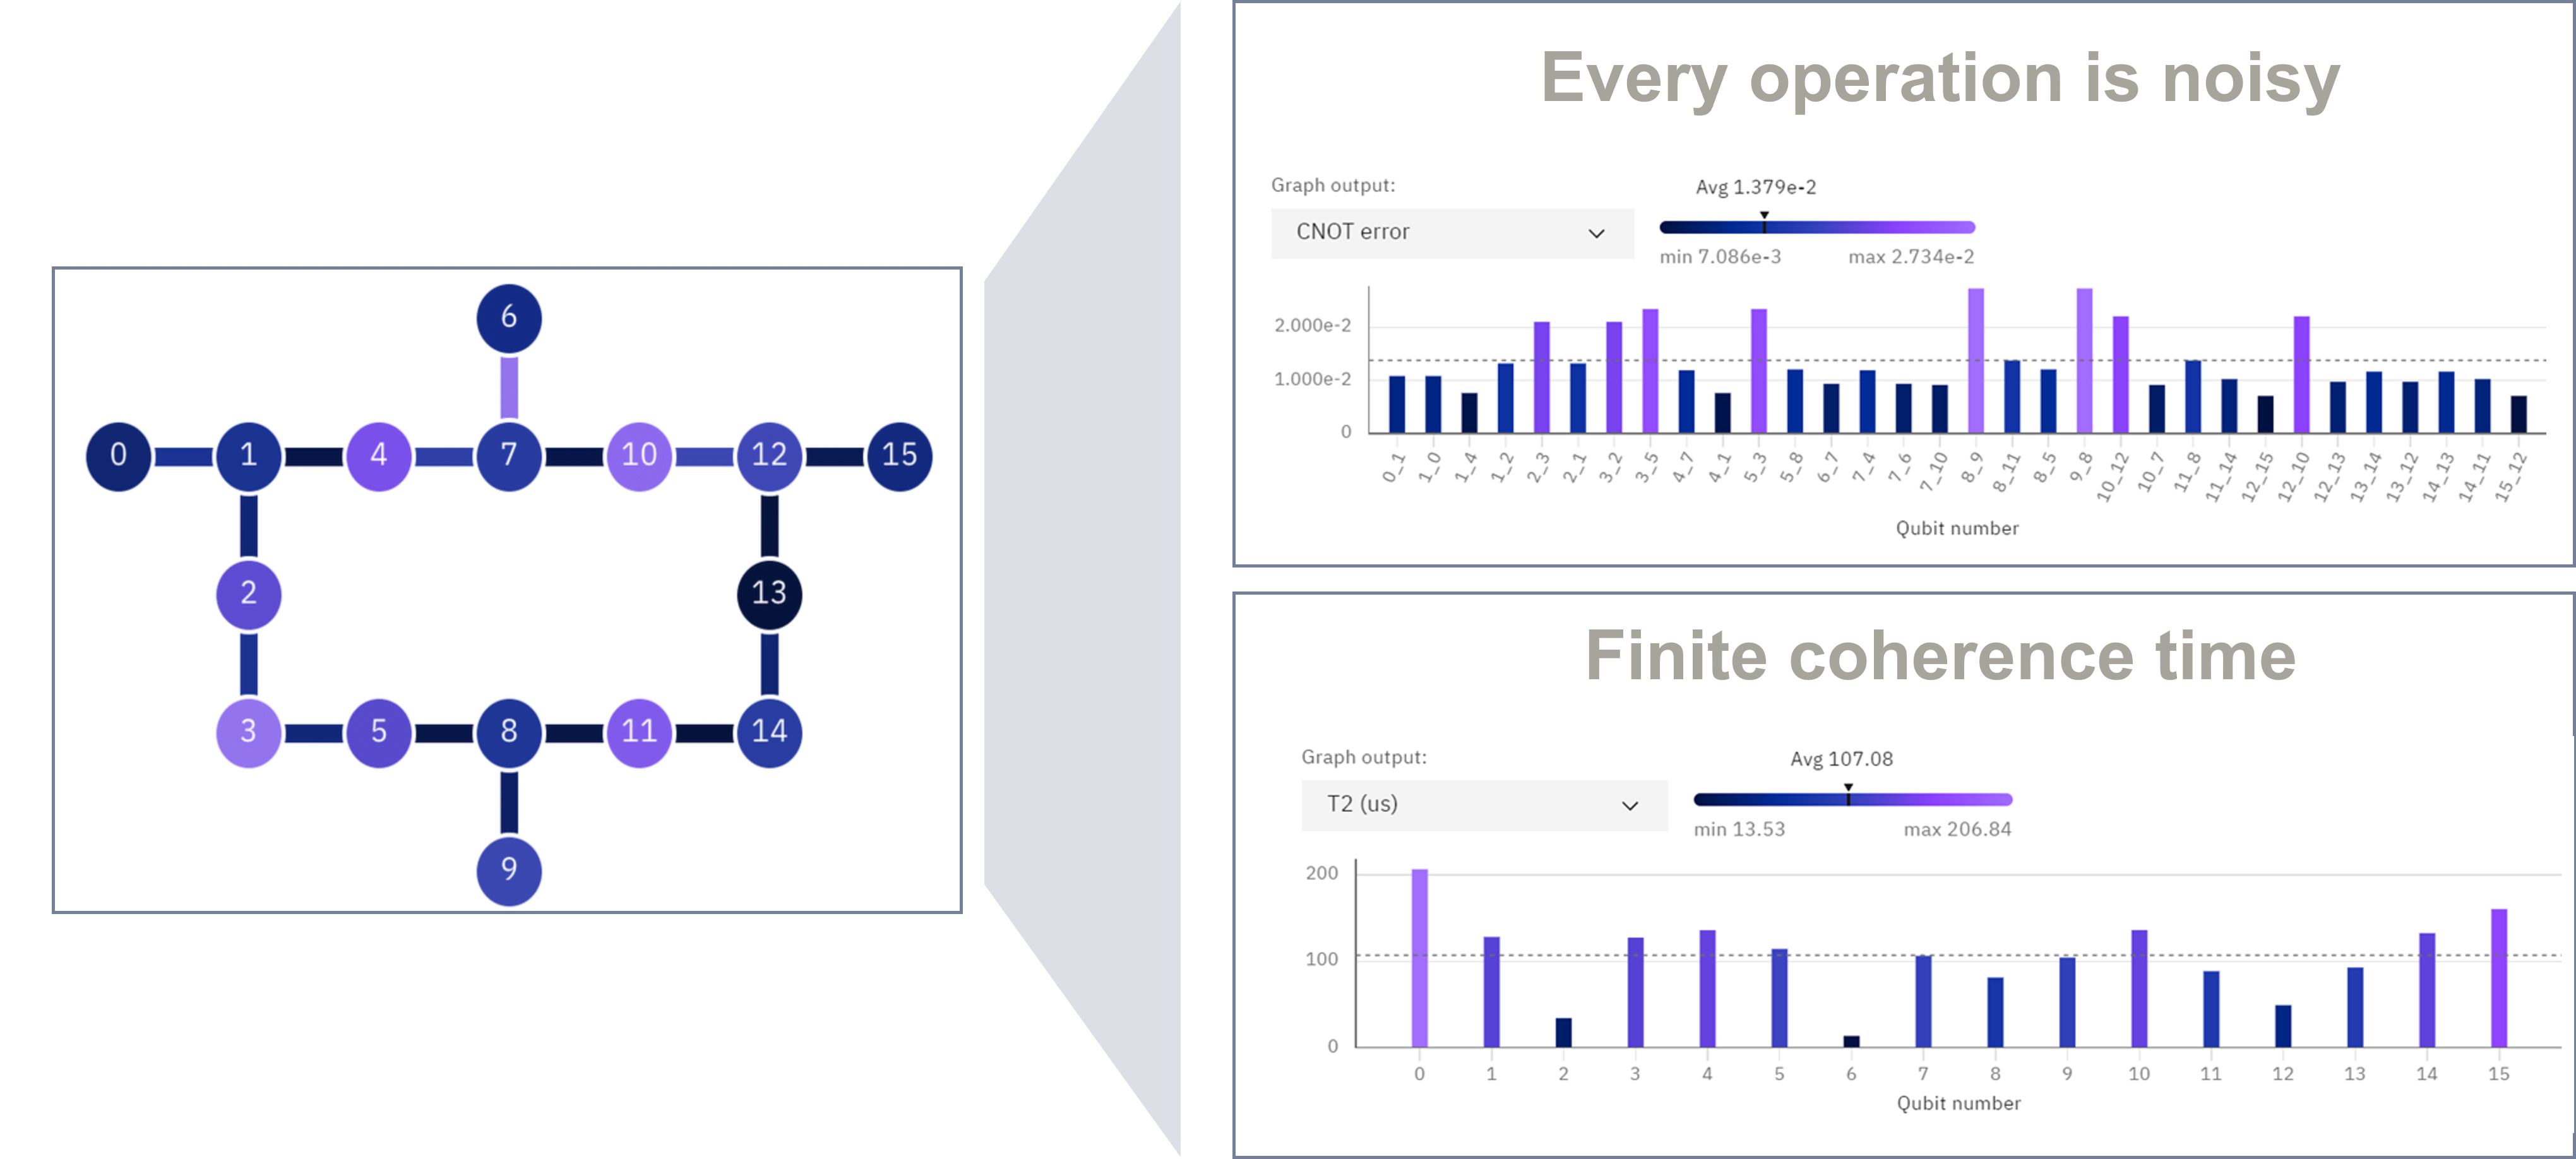

## TKET : an advanced quantum SDK



 - TKET is an open-source software platform for the development and execution of gate-level quantum computation.
 - TKET optimizes quantum circuits for a wide range of hardware and is available to use through the python module - pytket.
 
 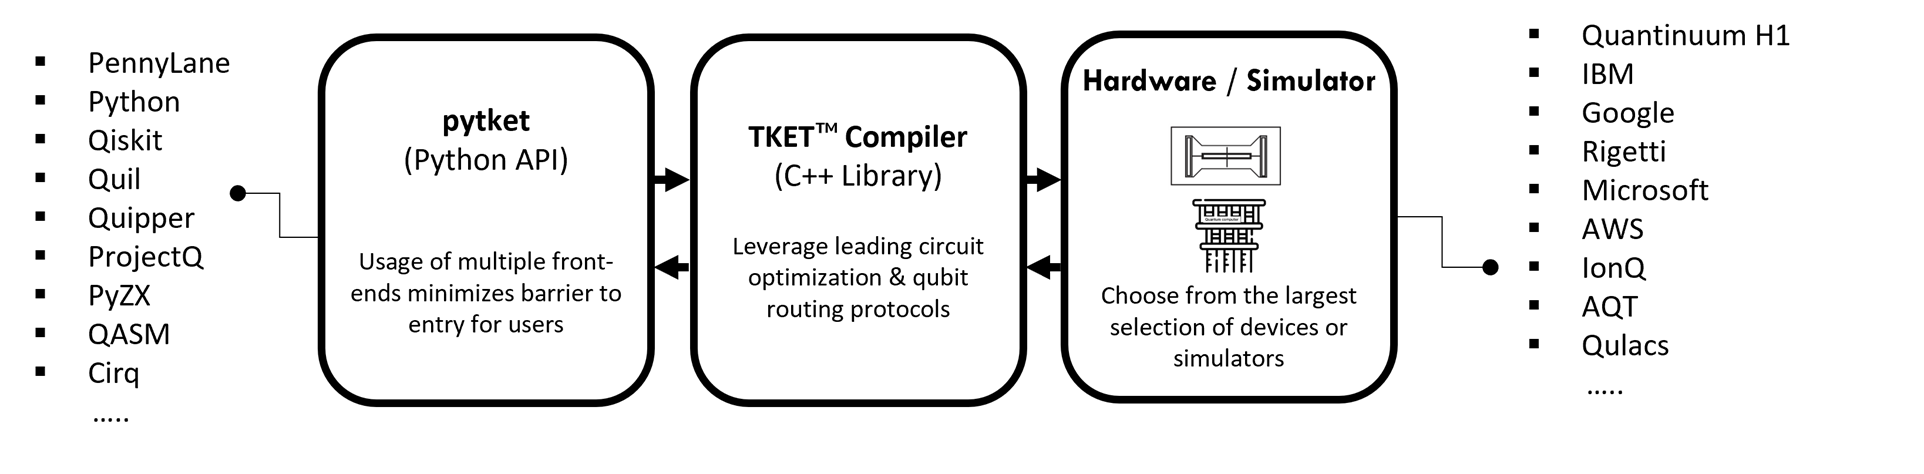


## Getting Started

<p>There is currently an implementation of TKET available in the form of the pytket python package.</p>
<p><center> <code> pip install pytket </code> </center></p>
<p>Additional extension modules are available for interfacing pytket with several quantum software packages, including: Qiskit, Cirq, PennyLane, pyQuil, and others.</p>
<p><center> <code> pip install pytket-qiskit </code> </center></p>
<p><center> <code> pip install pytket-pennylane </code> </center></p>
</br>
<p>Documentation and examples are available &rarr; <a href="https://github.com/CQCL/pytket-extensions">https://github.com/CQCL/pytket-extensions</a>.</p>

#### Note that most backend providers require you to set up credentials in order to submit jobs over the internet. These should be obtained directly from the providers

## pytket Extensions

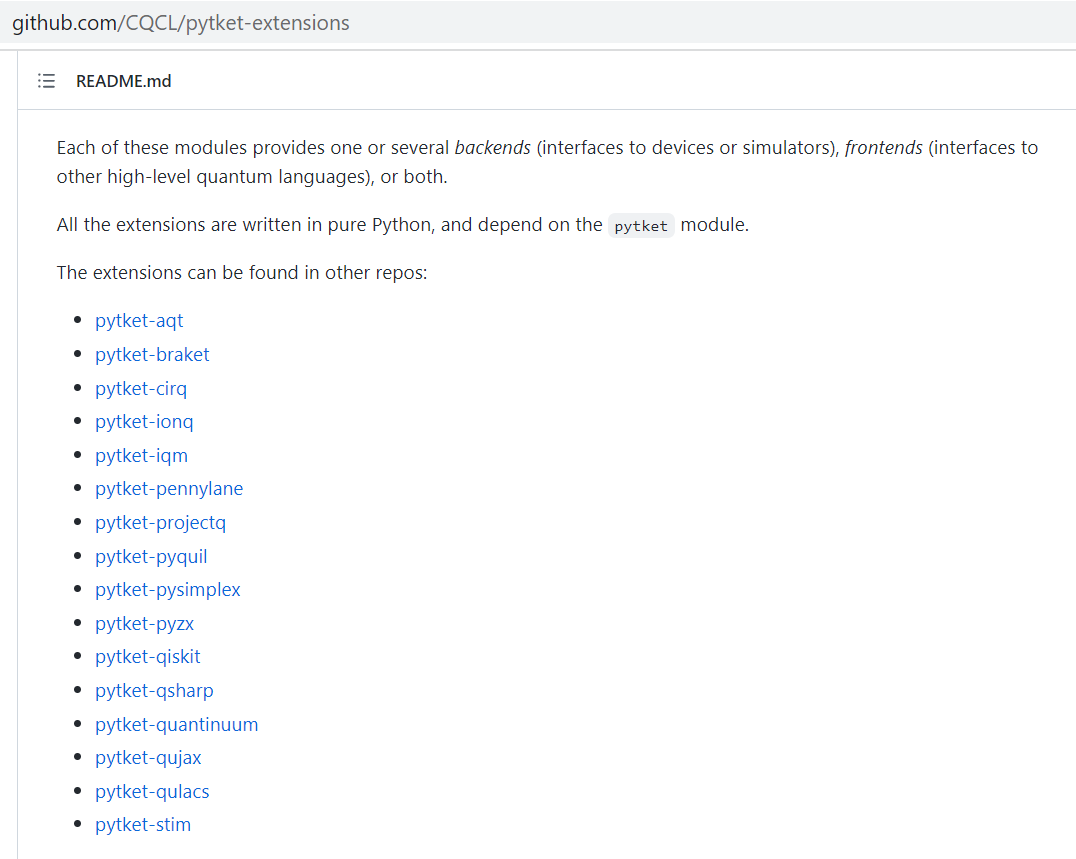

# How Are Quantum Circuits Constructed?

- Basic and advanced gates
- Measurement

## Basic Gates

Let's start by building a familiar circuit to generate the bell pair:
\\[ \left| \psi \right\rangle = \frac{1}{\sqrt{2}} \left( \left| 00 \right\rangle + \left| 11 \right\rangle\right) \\]
The simplest way to build a circuit in pytket is by adding gates sequentially.

In bra-ket notation:
\\[ \mathsf{CX} ( \mathsf{H} \otimes \mathsf{I} ) \left| 00 \right\rangle = \mathsf{CX} \frac{1}{\sqrt{2}}\left( \left| 0 \right\rangle + \left| 1 \right\rangle \right) \left| 0 \right\rangle = \frac{1}{\sqrt{2}} \left( \left| 00 \right\rangle + \left| 11 \right\rangle\right)\\]
where:
\\[ \mathsf{CX} = 
\begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 0 & 1\\
    0 & 0 & 1 & 0
\end{bmatrix}
\quad
\text{and}
\quad
\mathsf{H} = \frac{1}{\sqrt{2}}
\begin{bmatrix}
    1 & 1 \\
    1 & -1
\end{bmatrix}
\\]

The <code>Circuit</code> class is the unit of computation sent to a quantum processor.

In [1]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

circ = Circuit(2)
circ.H(0).CX(0,1)

render_circuit_jupyter(circ)

Gates are added in order of execution. The circuit is typically assumed to act on the state \\(\left| 0^n \right\rangle\\), producing a new state at the end.

In [2]:
from pytket.extensions.qiskit import AerStateBackend
import numpy as np

backend = AerStateBackend()
result = backend.run_circuit(circ)
result_state = result.get_state()

print(f"State verctor -> {np.round(result_state, 3)}")

State verctor -> [0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]


\\[ \left| \psi \right\rangle = \frac{1}{\sqrt{2}} \left( \left| 00 \right\rangle + \left| 11 \right\rangle\right) \\]

## Parameterized and Control Gates


- Paramterized gates &rarr; angle given first, and in units of \\( \pi \\).
- Control gates &rarr; control qubits given first, then target.

Less common gates available through <code>OpType</code> enum.

In [3]:
from pytket import OpType

circ = Circuit(3)

circ.Rx(0.5, 0)
circ.CRz(0.3, 1, 2)
circ.add_gate(OpType.CnX, [0, 2, 1])

render_circuit_jupyter(circ)

## Device Specific Gates

You'll find gates for a selection of devices in pytket. These include devices from Rigetti, IBM, OQC, Google, etc.

In the case of the Quantinuum devices, an instance of the \\( \mathsf{ZZPhase} \\) is native.
\\[ \mathsf{ZZPhase} : \left( \alpha \right) \rightarrow e^{-\frac{1}{2} i \pi \alpha \mathsf{Z} \otimes \mathsf{Z}} = 
\begin{bmatrix}
    e^{-\frac{1}{2} i \pi \alpha} & 0 & 0 & 0\\
    0 & e^{\frac{1}{2} i \pi \alpha} & 0 & 0\\
    0 & 0 & e^{\frac{1}{2} i \pi \alpha} & 0\\
    0 & 0 & 0 & e^{-\frac{1}{2} i \pi \alpha}
\end{bmatrix} 
\\]
In particular \\( \mathsf{ZZPhase}\left( \frac{1}{2} \right) \\) is used, and can be accessed as the \\( \mathsf{ZZMax} \\) gate via pytket.

In [4]:
circ = Circuit(4)

circ.add_gate(OpType.ZZPhase, 0.7, [0, 2])
circ.add_gate(OpType.ZZMax, [1, 3])
circ.add_gate(OpType.PhasedX, [-0.1, 0.5], [3])

render_circuit_jupyter(circ)

## TKET also includes a plethora of other gates

For more infromation on other gates please refer to the user manual → https://cqcl.github.io/pytket/manual/manual_circuit.html

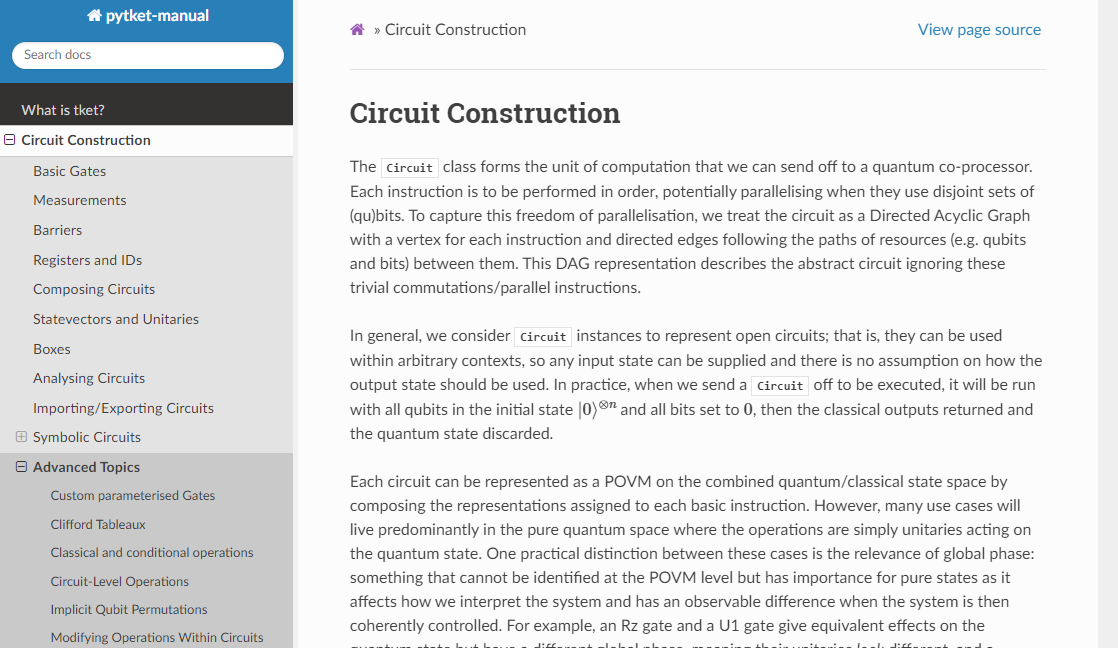



## Measurement

Measurements produce classical data from the resulting state. 
- All measurements are single-qubit measurements in the \\( \mathsf{Z} \\) basis.
- Other forms of measurements can be constructed by combining these with other operations.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_state_probs(state):
    state_dict = {'State':[i for i in range(len(result_state))], 'Probability':abs(state)**2}
    state_df = pd.DataFrame(state_dict)
    sns.catplot(x='State', y='Probability', kind='bar', data=state_df, aspect = 3, height=2)
    plt.show()
    
def plot_counts(counts):
    counts_record = [{"State":state, "Count":count} for state, count in counts.items()]
    count_df = pd.DataFrame().from_records(counts_record)
    sns.catplot(x='State', y='Count', kind='bar', data=count_df, aspect = 3, height=2)
    plt.show()

State verctor -> [0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]


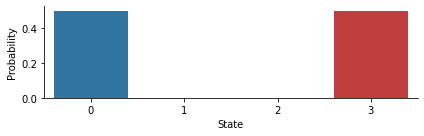

In [6]:
circ = Circuit(2).H(0).CX(0,1)

backend = AerStateBackend()
result_state = backend.run_circuit(circ).get_state()

render_circuit_jupyter(circ)
print(f"State verctor -> {np.round(result_state, 3)}")
plot_state_probs(result_state)

In [7]:
circ = Circuit(2,2).H(0).CX(0,1).measure_all()
render_circuit_jupyter(circ)

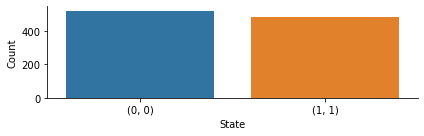

In [8]:
from pytket.extensions.qiskit import AerBackend

backend = AerBackend()
result_counts = backend.run_circuit(circ, n_shots=1000).get_counts()
plot_counts(result_counts)

# Importing, Exporting and Analyzing Quantum Circuits

TKET allows users to:
- Seamlessly move between software packages.
- Export circuits to commonly accepted standard representations.
- Analyze circuits to gauge their complexity.

Converters for other quantum software frameworks can optionally be included by installing the corresponding extension module. These are additional PyPI packages with names pytket-X.
<p><center> <code> pip install pytket-qiskit </code> </center></p>

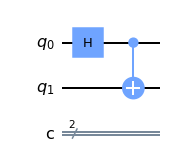

In [9]:
from qiskit import QuantumCircuit

qiskit_circ = QuantumCircuit(2, 2)

qiskit_circ.h(0)
qiskit_circ.cx(0, 1)

qiskit_circ.draw(output='mpl')

In [10]:
from pytket.extensions.qiskit import qiskit_to_tk

tket_circ = qiskit_to_tk(qiskit_circ)
tket_circ.H(0)
tket_circ.measure_all()

render_circuit_jupyter(tket_circ)

In [11]:
from pytket.extensions.qiskit import tk_to_qiskit
from qiskit import Aer
from qiskit import assemble

sv_sim = Aer.get_backend('aer_simulator')

tket_circ = Circuit(3).X(0).H(2).CX(0,1)
qiskit_circ = tk_to_qiskit(tket_circ)
qiskit_circ.measure_all()

qobj = assemble(qiskit_circ, shots=1000)
job = sv_sim.run(qobj)
hist = job.result().get_counts()
print(hist)

{'011': 533, '111': 467}


## Importing / Exporting circuits

### Chemistry-Inspired Circuit for $H_2$  

Sample circuit to compute the ground state energies for the hydrogen atom was obtained by InQuanto using the simplest qubit mapper/converter called the Jordan-Wigner Mapper.

### OpenQASM

OpenQASM is one of the current industry standards for low-level circuit description languages and is widely supported. It servers as a platform-independent method of storing circuits. TKET has bidirectional conversion support for QASM.

In [12]:
from pytket.qasm import circuit_from_qasm, circuit_to_qasm, circuit_to_qasm_str

circ = circuit_from_qasm('H2JordanWignerMapper.qasm')
render_circuit_jupyter(circ)

In [13]:
print(circuit_to_qasm_str(circ))

OPENQASM 2.0;
include "qelib1.inc";

qreg q[4];
x q[0];
sx q[1];
x q[2];
sx q[3];
h q[0];
h q[2];
cx q[1],q[0];
cx q[3],q[2];
rz(0.5*pi) q[0];
rz(0.5*pi) q[2];
cx q[1],q[0];
cx q[3],q[2];
h q[0];
sxdg q[1];
h q[2];
sxdg q[3];
sx q[0];
h q[1];
sx q[2];
h q[3];
cx q[1],q[0];
cx q[3],q[2];
rz(3.5*pi) q[0];
rz(3.5*pi) q[2];
cx q[1],q[0];
cx q[3],q[2];
sxdg q[0];
h q[1];
sxdg q[2];
h q[3];
sx q[0];
sx q[1];
h q[2];
sx q[3];
cx q[3],q[2];
cx q[2],q[1];
cx q[1],q[0];
rz(0.125*pi) q[0];
cx q[1],q[0];
sxdg q[0];
cx q[2],q[1];
h q[0];
sxdg q[1];
cx q[3],q[2];
h q[1];
h q[2];
sxdg q[3];
h q[2];
sx q[3];
cx q[3],q[2];
cx q[2],q[1];
cx q[1],q[0];
rz(0.125*pi) q[0];
cx q[1],q[0];
h q[0];
cx q[2],q[1];
h q[0];
h q[1];
cx q[3],q[2];
sx q[1];
h q[2];
sxdg q[3];
sx q[2];
sx q[3];
cx q[3],q[2];
cx q[2],q[1];
cx q[1],q[0];
rz(0.125*pi) q[0];
cx q[1],q[0];
h q[0];
cx q[2],q[1];
sx q[0];
sxdg q[1];
cx q[3],q[2];
h q[1];
sxdg q[2];
sxdg q[3];
sx q[2];
sx q[3];
cx q[3],q[2];
cx q[2],q[1];
cx q[1],q[0];
rz(3.8

## Circuit Analysis

Common circuit metrics like gate count and depth are used to approximate the difficulty of running it on a device, providing some basic tools to help distinguish different implementations of a given algorithm.
- On NISQ technology two-qubit gates are much slower and noisier.

Let's anayze our chemistry-inspired circuit for $H_2$  

In [14]:
print(f"Number of gates = {circ.n_gates}")
print(f"Circuit depth = {circ.depth()}")
print(f"Number of CX gates = {circ.n_gates_of_type(OpType.CX)}")

Number of gates = 150
Circuit depth = 83
Number of CX gates = 56


# Preparing and Running Quantum Circuits

In practice running on a real device is a little more complicated.
- So far we have used ideal classical simulators, which are noise free, do not have architectures, and have a diverse gate set.
- Now we want to run our chemistry inspired circuit on the IBMQ Oslo Emulator and Quantinuum H1-1 Emulator.

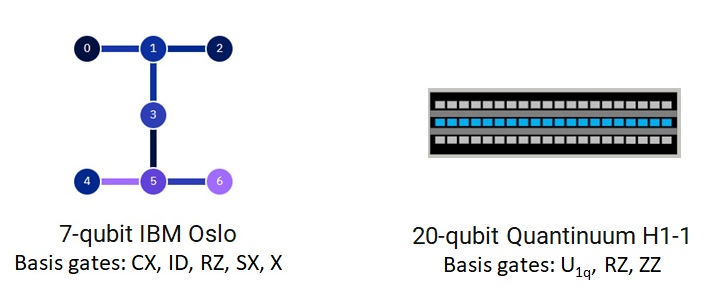

## Setting up IBMQ credentials

The Qiskit IBMQ account object is the local reference for accessing your IBM Quantum account, and all of the providers, backends, etc., that are available to you.

The IBM Quantum account has functions for handling administrative tasks. The credentials can be saved to your disk, or used in a session and never saved.

First, create an IBM Quantum account or log in to your existing account by visiting the IBM Quantum login page.https://quantum-computing.ibm.com/composer/docs/iqx/manage/account/ 

Then copy (and/or optionally regenerate) your API token from your IBM Quantum account page. You can now take your token, here called MY_API_TOKEN, and run:

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
from pytket.extensions.qiskit import IBMQBackend 
from qiskit import IBMQ

#IBMQ.save_account('MY_API_TOKEN') # Save TOKEN to disk
#IBMQ.load_account() # Load account from disk
#IBMQ.providers()    # List all available providers


dev_b = IBMQBackend('ibm_oslo',hub='ibm-q', group='open', project='main')
print(dev_b.backend_info.gate_set)

{<OpType.Rz: 33>, <OpType.U3: 34>, <OpType.U2: 35>, <OpType.U1: 36>, <OpType.CX: 39>, <OpType.SX: 28>, <OpType.X: 20>, <OpType.noop: 57>, <OpType.Measure: 58>, <OpType.Reset: 60>}


In [17]:
render_circuit_jupyter(circ)

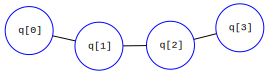

In [18]:
from pytket.utils import Graph
Graph(circ).get_qubit_graph()

TKET has a default pass manager for each backend:
<p><center> <code> get_compiled_circuit(circuit,optimisation_level) </code> </center>

- \\( \textsf{Level 0} \\) just solves the device constraints without optimizing.
- \\( \textsf{Level 1} \\) additionally performs some light optimizations. (This level is the default level)
- \\( \textsf{Level 2} \\) adds more intensive optimizations that can increase compilation time for large circuits.


In [19]:
compiled_qft_circ = dev_b.get_compiled_circuit(circ,0)
render_circuit_jupyter(compiled_qft_circ)

In [20]:
print("Gate set:", dev_b.backend_info.gate_set)

Gate set: {<OpType.Rz: 33>, <OpType.U3: 34>, <OpType.U2: 35>, <OpType.U1: 36>, <OpType.CX: 39>, <OpType.SX: 28>, <OpType.X: 20>, <OpType.noop: 57>, <OpType.Measure: 58>, <OpType.Reset: 60>}


In [21]:
# our initial circuit

print(f"Number of gates = {circ.n_gates}")
print(f"Circuit depth = {circ.depth()}")
print(f"Number of CX gates = {circ.n_gates_of_type(OpType.CX)}")

Number of gates = 150
Circuit depth = 83
Number of CX gates = 56


In [22]:
# compile to IBM Oslo by solving the device constraints without optimizing (level 0)

compiled_qft_circ = dev_b.get_compiled_circuit(circ,0)

print(f"Number of gates = {compiled_qft_circ.n_gates}")
print(f"Circuit depth = {compiled_qft_circ.depth()}")
print(f"Number of CX gates = {compiled_qft_circ.n_gates_of_type(OpType.CX)}")

Number of gates = 250
Circuit depth = 114
Number of CX gates = 62


In [23]:
# compile to IBM Oslo by solving the device constraints with optimization Lelvel 2

compiled_qft_circ2 = dev_b.get_compiled_circuit(circ,2)

print(f"Number of gates = {compiled_qft_circ2.n_gates}")
print(f"Circuit depth = {compiled_qft_circ2.depth()}")
print(f"Number of CX gates = {compiled_qft_circ2.n_gates_of_type(OpType.CX)}")

Number of gates = 84
Circuit depth = 59
Number of CX gates = 25


Let's compile the circuit for the Oslo backend using a the Qiskit compiler:

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
cq = tk_to_qiskit(circ)  #convert pytket circuit into qiskit circuit

from qiskit import IBMQ, transpile, QuantumCircuit

# Get backend for experiment
#IBMQ.load_account()
provider = IBMQ.get_provider(group='open')

# Use Qiskit highest default optimization pass level 3
# Qiskit transpilation process is not deterministic 
# and the output might vary in every run (seed_transpiler sets the PRNG seed).
optimized_3 = transpile(cq, provider.get_backend('ibm_oslo'), optimization_level=3, seed_transpiler=13)

# You can also use the SABRE method
#optimized_3 = transpile(cq, provider.get_backend('ibm_oslo'), optimization_level=3, layout_method='sabre', routing_method='sabre')
print('gates = ', optimized_3.count_ops())

print('depth = ', optimized_3.depth()) 

gates =  OrderedDict([('rz', 72), ('sx', 41), ('cx', 37), ('x', 10)])
depth =  88


### Compilation Summary for IBM Oslo
<br>



| Compiler | Version | Default Transpiler Pass Level | Total Number of Gates | Total Layers | Number of CX gates |
| --- | --- | --- | --- | --- | --- |
| None | NA |NA | 150 | 83 | 56 | 
| TKET | 1.7.3 | 0 | 247 | 114 | 55 | 
| TKET | 1.7.3 | 2 | 74 | 48 | 17 | 
| Qiskit | 0.36.2 | 3 | 158 | 88 | 37 | 
<br>

Now in today's NISQ area, this difference in the reduction of CX gates can matter, deciding between the success and failure of implementing a circuit on a real quantum computer.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_counts(counts):
    counts_record = [{"State":state, "Count":count} for state, count in counts.items()]
    count_df = pd.DataFrame().from_records(counts_record)
    sns.catplot(x='State', y='Count', kind='bar', data=count_df, aspect = 5, height=3)
    plt.show()

### Running the circuit on a perfect simulator and backend emulators

Let's run the circuit on a noisless simulator, such as the IBM AerBackend

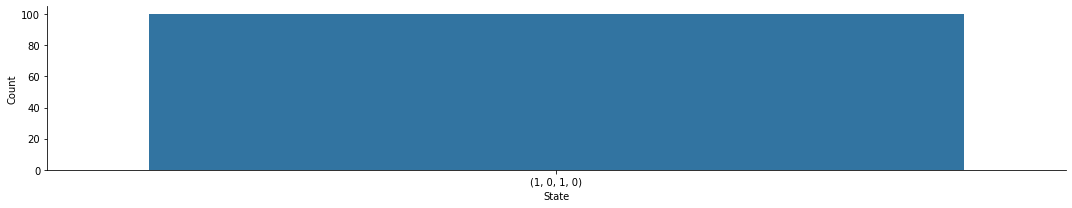

In [27]:
from pytket.extensions.qiskit import AerBackend

circ1=circ.measure_all()
backend1 = AerBackend()  # connect to the backend
comp_c1=backend1.get_compiled_circuit(circ1,2) # compile the circuit to satisfy the backend's requirements
result_counts = backend1.run_circuit(comp_c1, n_shots=100).get_counts() # submit the job to run the circuit 100 times
plot_counts(result_counts)

In [28]:
result_counts

Counter({(1, 0, 1, 0): 100})

### Run circuit on the IBM Oslo Emulator (TKET optimization level 0)

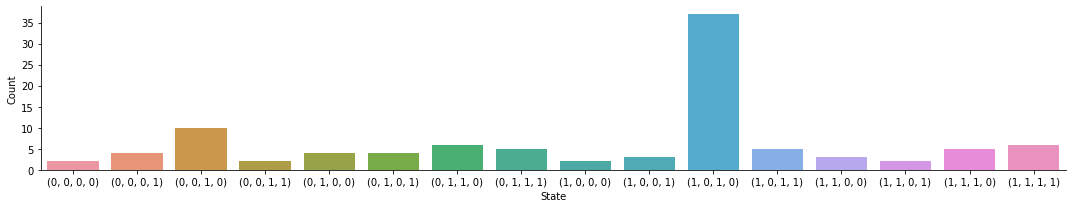

In [29]:
from pytket.extensions.qiskit import IBMQEmulatorBackend 

backend2 = IBMQEmulatorBackend('ibm_oslo',hub='ibm-q', group='open', project='main')
circ2=circ.measure_all()
comp_c2=backend2.get_compiled_circuit(circ2,0)

handle2 = backend2.process_circuit(comp_c2, n_shots=100)
result2 = backend2.get_result(handle2)
counts2=result2.get_counts()
plot_counts(counts2)

In [30]:
counts2

Counter({(0, 0, 0, 0): 2,
         (0, 0, 0, 1): 4,
         (0, 0, 1, 0): 10,
         (0, 0, 1, 1): 2,
         (0, 1, 0, 0): 4,
         (0, 1, 0, 1): 4,
         (0, 1, 1, 0): 6,
         (0, 1, 1, 1): 5,
         (1, 0, 0, 0): 2,
         (1, 0, 0, 1): 3,
         (1, 0, 1, 0): 37,
         (1, 0, 1, 1): 5,
         (1, 1, 0, 0): 3,
         (1, 1, 0, 1): 2,
         (1, 1, 1, 0): 5,
         (1, 1, 1, 1): 6})

### Run circuit on the IBM Oslo Emulator (TKET optimization level 2)

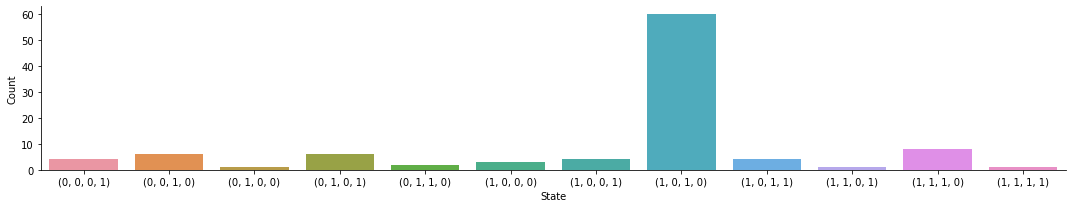

In [31]:
comp_c3=backend2.get_compiled_circuit(circ2,2)

handle3 = backend2.process_circuit(comp_c3, n_shots=100)
result3 = backend2.get_result(handle3)
counts3=result3.get_counts()
plot_counts(counts3)

In [32]:
counts3

Counter({(0, 0, 0, 1): 4,
         (0, 0, 1, 0): 6,
         (0, 1, 0, 0): 1,
         (0, 1, 0, 1): 6,
         (0, 1, 1, 0): 2,
         (1, 0, 0, 0): 3,
         (1, 0, 0, 1): 4,
         (1, 0, 1, 0): 60,
         (1, 0, 1, 1): 4,
         (1, 1, 0, 1): 1,
         (1, 1, 1, 0): 8,
         (1, 1, 1, 1): 1})

### Access to Quantinuum and IonQ Backends

You can get access to [Quantinuum](https://www.quantinuum.com/) and [IonQ](https://ionq.com/) simulators, emulators, and quantum machines through Microsoft Azure. When creating your workspace, first-time users automatically get free 500 (USD) Azure Quantum Credits for use with each participating quantum hardware provider. If you have consumed all the credits and need more, you can apply to the [Azure Quantum Credits program](https://microsoft.qualtrics.com/jfe/form/SV_3fl9dfFrkC3g0aG?aq_source=organic). For this Hackathon, we will use the simulators and emulators that do not use Azure Quantum Credits and hence are entirely free.

In [33]:
# pip install pytket-qsharp
# from pytket.extensions.qsharp import AzureBackend

## call H1-1 Emulator
#backend3 = AzureBackend("quantinuum.hqs-lt-s1-sim",resourceId="your resource ID",location="westus")

For more detailed instructions, look at the https://github.com/spendierk/Q-SITE-Toronto-2022 repository:
https://github.com/spendierk/Q-SITE-Toronto-2022/blob/main/Access%20to%20Quantinuum%20and%20IonQ%20Backends.ipynb

### Run circuit on the Quantinuum's H1-1 Emulator (TKET optimization level 2).

In [34]:
## I will use my direct access to the Quantinuum backend
#pip install pytket-quantinuum

from pytket.extensions.quantinuum import QuantinuumBackend

backend3 = QuantinuumBackend('H1-1E') # emulator

comp_c4=backend3.get_compiled_circuit(circ2,2)

print(f"Our circuit has {comp_c4.n_gates} quantum gates in total and an overall")
print(f"depth of {comp_c4.depth()}.")
print(f"Of these gates {comp_c4.n_gates_of_type(OpType.ZZMax)} are two qubit gate, ZZMax, counts.")

Enter your Quantinuum email: kathrin.spendier@quantinuum.com
Enter your Quantinuum password: ········
Our circuit has 60 quantum gates in total and an overall
depth of 37.
Of these gates 17 are two qubit gate, ZZMax, counts.


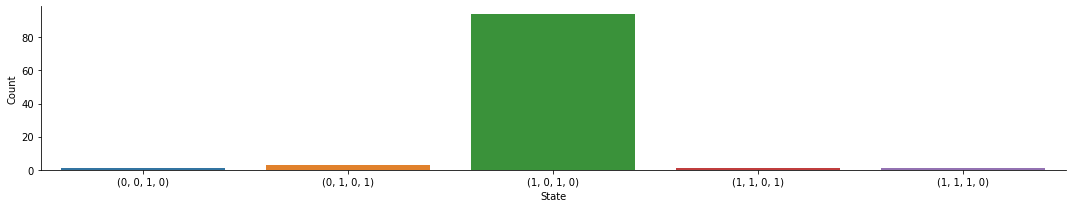

In [35]:
handle4 = backend3.process_circuit(comp_c4, n_shots=100)
result4 = backend3.get_result(handle4)
counts4=result4.get_counts()
plot_counts(counts4)

In [36]:
counts4

Counter({(0, 0, 1, 0): 1,
         (0, 1, 0, 1): 3,
         (1, 0, 1, 0): 94,
         (1, 1, 0, 1): 1,
         (1, 1, 1, 0): 1})

### Results for running on emulator backends
<br>

| Compiler | Compiler Version | Backend | Optimization Level | Counts for "1,0,1,0" state out of 100 |
| --- | --- | --- | --- | --- |
| TKET | 1.7.3 |Perfect Simulator |NA | 100 |
| TKET | 1.7.3 |Oslo Emulator | 0 | 37 |
| TKET | 1.7.3 |Oslo Emulator | 2 | 60 |
| TKET | 1.7.3 |H1-1 Emulator | 2 | 94 |

<br>

In today’s NISQ area, this difference in the reduction of the number of gates and hardware noise performance can matter deciding between the success and failure of implementing a circuit on a real quantum computer.

## Workshop Summary

We have covered the following:
1. Installing and getting started with TKET and it's extensions.
2. Quantum gates, measurement and the construction of quantum circuits.
3. Tools that enable moving code between devices and software packages.
4. Steps required to prepare circuits to be run on a quantum computer.
5. Running circuits on quantum computers and classical simulators.

### Further Workshop Topics
 - Predicates and Rebases
 - Placement and mapping
 - more on Optimization! (i.e. custom pass sequence)

### TKET specific Compiler Passes

 - Synthesize many qubit operations to 1-, 2-qubit gates 
 - Symbolic expression optimization
 - Resynthesize sub-circuits via special representations: ZX-terms, Clifford tableaux, Phase-polynomials / Phase gadget
 - Exact and approximate synthesis of unitaries
 - Architecture-aware synthesis
 - Mapping to chosen gate basis
 - Allocating “virtual” qubits to physical qubits
 - Mapping and routing circuits to fixed architectures
 - … more!


### Useful Links

 - User manual → https://cqcl.github.io/pytket/manual/index.html
 - TKET github → https://github.com/CQCL/tket
 - Example notebooks → https://github.com/CQCL/pytket/tree/main/examples

Research Papers
 - TKET paper → https://arxiv.org/abs/2003.10611
 - Qubit Routing → https://arxiv.org/abs/1902.08091
 - Phase Gadget Synthesis → https://arxiv.org/abs/1906.01734
 - UCC Compilation → https://arxiv.org/abs/2007.10515

Public TKET Slack Channel to reach TKET dev team
 - https://tketusers.slack.com/ssb/redirect#/shared-invite/email


<center> <h1> Questions </h1> </center>


<br>
<br>

Kathrin Spendier &rarr; <kathrin.spendier@quantinuum.com>, 


Notebook and slides available at: &rarr; https://github.com/spendierk/Q-SITE-Toronto-2022